In [1]:
# 2 train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [3]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [4]:
# look at  line only
two_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('2')]

In [5]:
# look at all station names
two_train_all['STATION'].unique()

array(['116 ST', '125 ST', '135 ST', '14 ST', '149/GRAND CONC', '174 ST',
       '219 ST', '225 ST', '233 ST', '3 AV-149 ST', '34 ST-PENN STA',
       '42 ST-PORT AUTH', '6 AV', '72 ST', '96 ST', 'ALLERTON AV',
       'ATL AV-BARCLAY', 'BERGEN ST', 'BEVERLY RD', 'BOROUGH HALL',
       'BOTANIC GARDEN', 'BRONX PARK EAST', 'BURKE AV', 'CENTRAL PK N110',
       'CHAMBERS ST', 'CHURCH AV', 'CLARK ST', 'E 180 ST',
       'EASTN PKWY-MUSM', 'FLATBUSH AV-B.C', 'FRANKLIN AV', 'FREEMAN ST',
       'FULTON ST', 'GRAND ARMY PLAZ', 'GUN HILL RD', 'HOYT ST',
       'INTERVALE AV', 'JACKSON AV', 'NEREID AV', 'NEVINS ST',
       'NEWKIRK AV', 'PARK PLACE', 'PELHAM PKWY', 'PRESIDENT ST',
       'PROSPECT AV', 'SIMPSON ST', 'STERLING ST', 'TIMES SQ-42 ST',
       'WAKEFIELD/241', 'WALL ST', 'WEST FARMS SQ', 'WINTHROP ST',
       'WORLD TRADE CTR'], dtype=object)

In [6]:
# check station count
two_train_all['STATION'].count()

62

In [8]:
# needs further cleaning
two_train_all["STATION"].replace("42 ST-PORT AUTH", value="TIMES SQ-42 ST", inplace=True)
two_train_all["STATION"].replace("6 AV", value="14 ST", inplace=True)
two_train_all["STATION"].replace("WORLD TRADE CTR", value="PARK PLACE", inplace=True)
two_train_all["STATION"].replace("BOTANIC GARDEN", value="FRANKLIN AV", inplace=True)

In [10]:
# now sum same name rows
two_commuters = two_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
two_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
116 ST,8197.0,2255.0
125 ST,7578.0,4778.0
135 ST,5182.0,817.0
14 ST,6159.0,8166.0
149/GRAND CONC,4322.0,2052.0


In [11]:
# order stations in excel
# save as csv
two_commuters.to_csv('two_commuters.csv')

In [12]:
# open ordered CSV
csv_path_2 = 'two_commuters_order.csv'
two_commuters_order = pd.read_csv(csv_path_2, encoding="utf-8")
two_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,WAKEFIELD/241,8341,2826
1,NEREID AV,6337,660
2,233 ST,8633,569
3,225 ST,7256,820
4,219 ST,6311,692


In [13]:
two_commuters_order['AM_AVG_ENTER'] = two_commuters_order['AM_ENTERS']/5

In [14]:
two_commuters_order['AM_AVG_EXIT'] = two_commuters_order['AM_EXITS']/5
two_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,WAKEFIELD/241,8341,2826,1668.2,565.2
1,NEREID AV,6337,660,1267.4,132.0
2,233 ST,8633,569,1726.6,113.8
3,225 ST,7256,820,1451.2,164.0
4,219 ST,6311,692,1262.2,138.4


In [15]:
# order stations in excel
# save as csv
two_commuters_order.to_csv('two_commuters_final.csv')

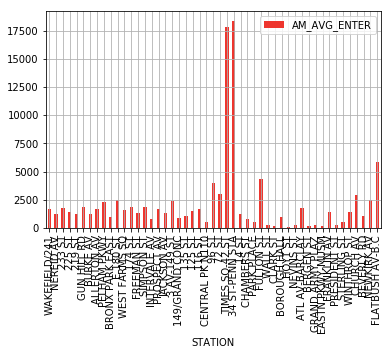

In [16]:
# graph 2 Train AM AVG ENTERS
plt = two_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#EE352E')
plt.grid()

# save the fig
plt.figure.savefig('2-AM-enter.pdf')

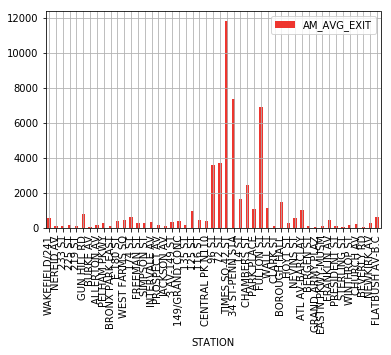

In [17]:
# graph 2 Train AM AVG EXITS
plt = two_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#EE352E')
plt.grid()

# save the fig
plt.figure.savefig('2-AM-exit.pdf')